Epoch 0: Loss = 0.6905
Epoch 100: Loss = 0.4091
Epoch 200: Loss = 0.3776
Epoch 300: Loss = 0.3501
Epoch 400: Loss = 0.3297
Epoch 500: Loss = 0.3157
Epoch 600: Loss = 0.3065
Epoch 700: Loss = 0.3003
Epoch 800: Loss = 0.2960
Epoch 900: Loss = 0.2929
Test Accuracy: 83.65%


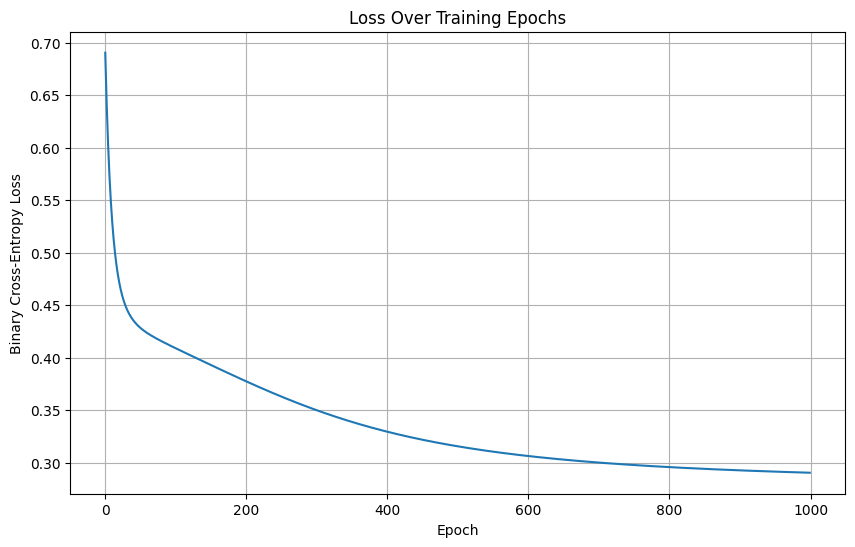

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("telecom.csv")
df = df.drop(columns=["ID", "Tariff plan", "Complaints"])
df = pd.get_dummies(df, columns=["Status", "Age group"], drop_first=True)

X = df.drop("Churn", axis=1).values
y = df["Churn"].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Binary cross-entropy loss
def binary_cross_entropy(y_hat, y):
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate=0.01):
        m = y.shape[0]
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        self.losses = []
        for i in range(epochs):
            y_hat = self.forward(X)
            loss = binary_cross_entropy(y_hat, y)
            self.losses.append(loss)
            self.backward(X, y, learning_rate)
            if i % 100 == 0:
                print(f"Epoch {i}: Loss = {loss:.4f}")

    def predict(self, X):
        return self.forward(X) > 0.5

# Train and test the neural network
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=5, output_size=1)
nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.2%}")

# Plot loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(nn.losses)
plt.title("Loss Over Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()


Epoch 1, Loss: 0.3770
Epoch 2, Loss: 0.3222
Epoch 3, Loss: 0.3011
Epoch 4, Loss: 0.2910
Epoch 5, Loss: 0.2841
Epoch 6, Loss: 0.2787
Epoch 7, Loss: 0.2745
Epoch 8, Loss: 0.2713
Epoch 9, Loss: 0.2686
Epoch 10, Loss: 0.2659
Epoch 11, Loss: 0.2630
Epoch 12, Loss: 0.2596
Epoch 13, Loss: 0.2555
Epoch 14, Loss: 0.2508
Epoch 15, Loss: 0.2454
Epoch 16, Loss: 0.2394
Epoch 17, Loss: 0.2332
Epoch 18, Loss: 0.2269
Epoch 19, Loss: 0.2208
Epoch 20, Loss: 0.2152
Epoch 21, Loss: 0.2100
Epoch 22, Loss: 0.2055
Epoch 23, Loss: 0.2016
Epoch 24, Loss: 0.1981
Epoch 25, Loss: 0.1951
Epoch 26, Loss: 0.1925
Epoch 27, Loss: 0.1902
Epoch 28, Loss: 0.1881
Epoch 29, Loss: 0.1861
Epoch 30, Loss: 0.1843
Epoch 31, Loss: 0.1825
Epoch 32, Loss: 0.1808
Epoch 33, Loss: 0.1792
Epoch 34, Loss: 0.1777
Epoch 35, Loss: 0.1761
Epoch 36, Loss: 0.1747
Epoch 37, Loss: 0.1732
Epoch 38, Loss: 0.1718
Epoch 39, Loss: 0.1705
Epoch 40, Loss: 0.1691
Epoch 41, Loss: 0.1677
Epoch 42, Loss: 0.1663
Epoch 43, Loss: 0.1649
Epoch 44, Loss: 0.16

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_62389/595438558.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_preds.append(float(A[-1]))


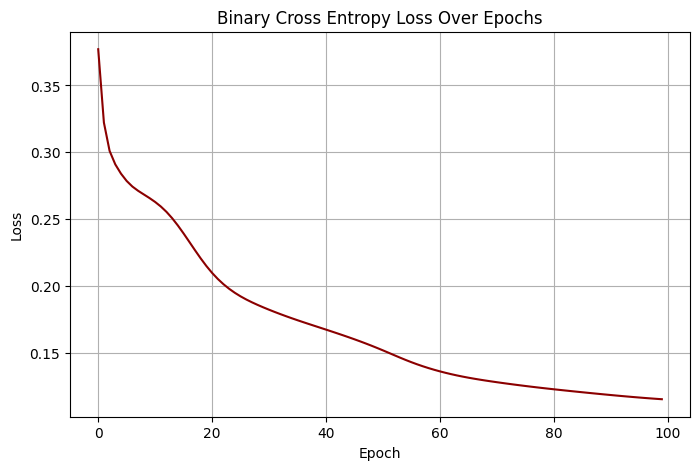

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---------------------------
# Step 1: Data Preprocessing
# ---------------------------
df = pd.read_csv("telecom.csv")

# Drop irrelevant columns
df.drop(columns=["ID", "Tariff plan", "Complaints"], inplace=True)

# Convert categorical features to dummy variables
df = pd.get_dummies(df, columns=["Status", "Age group"], drop_first=True)

# Separate features and target
X = df.drop("Churn", axis=1).values
y = df["Churn"].values.reshape(-1, 1)  # shape: (n_samples, 1)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 2: Neural Network Utils
# ---------------------------

def sigmoid(z):
    """Sigmoid activation function."""
    return 1.0 / (1.0 + np.exp(-z))

def d_sigmoid(z):
    """Derivative of sigmoid."""
    s = sigmoid(z)
    return s * (1 - s)

def binary_cross_entropy(a, y):
    """Binary Cross Entropy loss."""
    eps = 1e-15
    a = np.clip(a, eps, 1 - eps)
    return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

def accuracy(y_pred, y_true):
    """Compute binary classification accuracy."""
    return np.mean((y_pred > 0.5) == y_true)

# ---------------------------
# Step 3: Network Architecture
# ---------------------------

class DenseChurnNetwork:
    def __init__(self, layer_dims=[X.shape[1], 10, 1]):
        """
        Initialize network weights and biases using He initialization.
        :param layer_dims: List of neuron counts per layer (input to output)
        """
        self.layer_dims = layer_dims
        self.num_layers = len(layer_dims) - 1  # excluding input layer
        self.W = [None]  # index 0 is unused
        self.B = [None]

        for l in range(1, len(layer_dims)):
            weight = np.random.randn(layer_dims[l], layer_dims[l - 1]) * np.sqrt(2 / layer_dims[l - 1])
            bias = np.zeros((layer_dims[l], 1))
            self.W.append(weight)
            self.B.append(bias)

    def forward(self, x):
        """
        Feedforward computation.
        :param x: Input column vector (n_features, 1)
        :return: List of pre-activations Z, and activations A
        """
        A = [x]
        Z = [None]  # placeholder for 0th layer

        for l in range(1, self.num_layers + 1):
            z = self.W[l] @ A[l - 1] + self.B[l]
            a = sigmoid(z)
            Z.append(z)
            A.append(a)

        return Z, A

    def backward(self, x, y):
        """
        Backpropagation and gradient descent step for one sample.
        :param x: input vector (n_features, 1)
        :param y: label (scalar or (1,1) array)
        """
        Z, A = self.forward(x)
        L = self.num_layers
        deltas = [None] * (L + 1)

        # Output layer error
        deltas[L] = (A[L] - y) * d_sigmoid(Z[L])

        # Backpropagate the error
        for l in range(L - 1, 0, -1):
            deltas[l] = (self.W[l + 1].T @ deltas[l + 1]) * d_sigmoid(Z[l])

        # Gradient descent step
        for l in range(1, L + 1):
            self.W[l] -= self.alpha * deltas[l] @ A[l - 1].T
            self.B[l] -= self.alpha * deltas[l]

    def train(self, X_train, y_train, epochs=100, alpha=0.1):
        """
        Train the network using SGD.
        """
        self.alpha = alpha
        self.losses = []

        for epoch in range(epochs):
            cost = 0
            for xi, yi in zip(X_train, y_train):
                xi = xi.reshape(-1, 1)
                yi = np.array(yi).reshape(1, 1)
                self.backward(xi, yi)
                _, A = self.forward(xi)
                cost += binary_cross_entropy(A[-1], yi)
            avg_cost = cost / len(X_train)
            self.losses.append(avg_cost)
            print(f"Epoch {epoch+1}, Loss: {avg_cost:.4f}")

    def predict(self, X):
        """
        Predict output for input matrix X.
        :return: predictions as (n_samples, 1) array
        """
        y_preds = []
        for xi in X:
            xi = xi.reshape(-1, 1)
            _, A = self.forward(xi)
            y_preds.append(float(A[-1]))
        return np.array(y_preds).reshape(-1, 1)

# ---------------------------
# Step 4: Train the Model
# ---------------------------
model = DenseChurnNetwork(layer_dims=[X.shape[1], 12, 6, 1])
model.train(X_train, y_train, epochs=100, alpha=0.1)

# ---------------------------
# Step 5: Evaluate the Model
# ---------------------------
y_pred_test = model.predict(X_test)
test_acc = accuracy(y_pred_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2%}")

# ---------------------------
# Step 6: Plot Loss Over Epochs
# ---------------------------
plt.figure(figsize=(8, 5))
plt.plot(model.losses, color='darkred')
plt.title("Binary Cross Entropy Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
